In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("clevelanda.csv")
print(df)

     age  gender  cp  trestbps  chol  fps  restecg  thalach  exang  oldpeak  \
0     63       1   1       145   233    1        2      150      0      2.3   
1     67       1   4       160   286    0        2      108      1      1.5   
2     67       1   4       120   229    0        2      129      1      2.6   
3     37       1   3       130   250    0        0      187      0      3.5   
4     41       0   2       130   204    0        2      172      0      1.4   
..   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45       1   1       110   264    0        0      132      0      1.2   
299   68       1   4       144   193    1        0      141      0      3.4   
300   57       1   4       130   131    0        0      115      1      1.2   
301   57       0   2       130   236    0        2      174      0      0.0   
302   38       1   3       138   175    0        0      173      0      0.0   

     slope ca thal  class  
0        3  0    6     

In [10]:
# print(df.head(5))
# print(df.tail(5))
# df.info()
df.columns


Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'],
      dtype='object')

In [4]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
298,False
299,False
300,False
301,False


In [7]:
df

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [14]:
df.iloc[0:5,0:6]

,age,gender,cp,trestbps,chol,fps
0,63,1,1,145,233,1
1,67,1,4,160,286,0
2,67,1,4,120,229,0
3,37,1,3,130,250,0
4,41,0,2,130,204,0


In [16]:
df['ca'].unique()
df['class'].unique()

array([0, 2, 1, 3, 4])

In [17]:
df['ca'].value_counts()

,count
ca,
0,176
1,65
2,38
3,20
?,4


In [18]:
pip install plotly-express

In [20]:
import plotly.express as px


In [23]:
px.histogram(df,x='age',nbins=20)

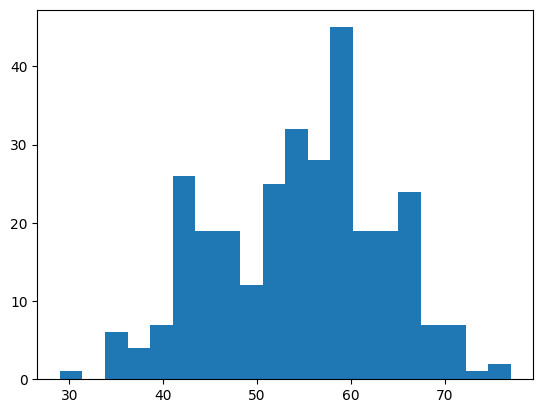

In [24]:
import matplotlib.pyplot as plt
plt.hist(df['age'],bins=20)
plt.show()

<Axes: >

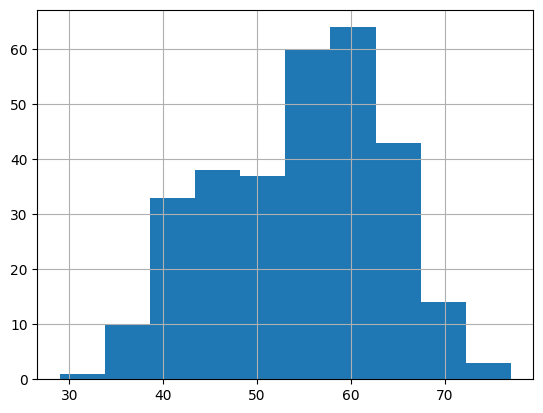

In [25]:
df['age'].hist()

In [32]:
rows_with_ques=df.isin(['?']).any(axis=0)
print(rows_with_ques)

age         False
gender      False
cp          False
trestbps    False
chol        False
fps         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
class       False
dtype: bool


In [42]:
# import numpy as np
# df['ca'].replace('?', df['ca'].mean())
# df['thal'].replace('?',df['thal'].mean())
# print(df)
unique_values={col:df[col].unique() for col in df.columns}
unique_values

{'age': array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
        66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
        35, 29, 70, 77, 38, 74, 76]),
 'gender': array([1, 0]),
 'cp': array([1, 4, 3, 2]),
 'trestbps': array([145, 160, 120, 130, 140, 172, 150, 110, 132, 117, 135, 112, 105,
        124, 125, 142, 128, 170, 155, 104, 180, 138, 108, 134, 122, 115,
        118, 100, 200,  94, 165, 102, 152, 101, 126, 174, 148, 178, 158,
        192, 129, 144, 123, 136, 146, 106, 156, 154, 114, 164]),
 'chol': array([233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 256,
        263, 199, 168, 239, 275, 266, 211, 283, 284, 224, 206, 219, 340,
        226, 247, 167, 230, 335, 234, 177, 276, 353, 243, 225, 302, 212,
        330, 175, 417, 197, 198, 290, 253, 172, 273, 213, 305, 216, 304,
        188, 282, 185, 232, 326, 231, 269, 267, 248, 360, 258, 308, 245,
        270, 208, 264, 321, 274, 325, 235, 257, 164, 141, 252, 255, 201,
       

In [44]:
df=df.replace('?',np.nan)
unique_values={col:df[col].unique() for col in df.columns}
unique_values

{'age': array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
        66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
        35, 29, 70, 77, 38, 74, 76]),
 'gender': array([1, 0]),
 'cp': array([1, 4, 3, 2]),
 'trestbps': array([145, 160, 120, 130, 140, 172, 150, 110, 132, 117, 135, 112, 105,
        124, 125, 142, 128, 170, 155, 104, 180, 138, 108, 134, 122, 115,
        118, 100, 200,  94, 165, 102, 152, 101, 126, 174, 148, 178, 158,
        192, 129, 144, 123, 136, 146, 106, 156, 154, 114, 164]),
 'chol': array([233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 256,
        263, 199, 168, 239, 275, 266, 211, 283, 284, 224, 206, 219, 340,
        226, 247, 167, 230, 335, 234, 177, 276, 353, 243, 225, 302, 212,
        330, 175, 417, 197, 198, 290, 253, 172, 273, 213, 305, 216, 304,
        188, 282, 185, 232, 326, 231, 269, 267, 248, 360, 258, 308, 245,
        270, 208, 264, 321, 274, 325, 235, 257, 164, 141, 252, 255, 201,
       

In [46]:
rows_with_ques=df.isin(['?']).any(axis=0)
print(rows_with_ques)
print(df.isna().sum())

age         False
gender      False
cp          False
trestbps    False
chol        False
fps         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
class       False
dtype: bool
age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64


In [55]:
print(df['ca'].mode()[0])
print(df['thal'].mode()[0])


0
3


In [65]:
print(df['ca'].dtype)
print(df['thal'].dtype)

object
object


In [66]:
print(df['ca'].median())
print(df['thal'].median())

TypeError: Cannot convert ['0' '3' '2' '0' '0' '0' '2' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '2' '2' '0' '0' '0' '0' '0' '2' '2' '0' '0' '0' '0'
 '0' '1' '1' '0' '3' '0' '2' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0'
 '1' '1' '1' '0' '1' '1' '0' '0' '3' '0' '1' '2' '0' '0' '0' '0' '0' '2'
 '2' '2' '1' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '3' '3' '0' '0' '1' '1' '2' '1' '0' '0' '0' '1' '1' '3' '0' '1' '1'
 '1' '0' '0' '1' '0' '0' '1' '0' '0' '0' '3' '1' '2' '3' '0' '0' '1' '0'
 '2' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '3' '0' '0' '1' '0' '0' '0' '1' '1' '3' '0' '2' '2' '1' '0' '3'
 '0' '0' '2' '0' nan '1' '0' '0' '1' '0' '0' '0' '2' '1' '3' '1' '1' '3'
 '0' '2' '2' '0' '0' '2' '0' '3' '1' '3' '0' '3' nan '3' '0' '2' '1' '0'
 '0' '0' '0' '0' '1' '0' '0' '3' '2' '0' '0' '0' '0' '0' '0' '2' '1' '0'
 '0' '0' '2' '0' '0' '0' '0' '2' '2' '0' '0' '1' '1' '1' '0' '0' '3' '1'
 '1' '2' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '1' '1' '2' '0' '0' '1'
 '1' '0' '0' '0' '2' '0' '0' '0' '1' '2' '0' '0' '1' '0' '0' '1' '0' '0'
 '1' '0' '2' '0' '2' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1' '3' '2' nan
 '0' '0' '0' '0' '0' '2' '0' '0' '2' '0' '0' '2' '1' '1' nan] to numeric

In [67]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
print(df['ca'].median())
print(df['thal'].median())

0.0
3.0


In [68]:
print(df['ca'].mean())

0.6722408026755853


In [71]:
print(df['ca'].dtype)

float64


In [82]:
df['ca'].fillna(df['ca'].mode()[0])
df['thal'].fillna(df['thal'].mode()[0])
print(df)

     age  gender  cp  trestbps  chol  fps  restecg  thalach  exang  oldpeak  \
0     63       1   1       145   233    1        2      150      0      2.3   
1     67       1   4       160   286    0        2      108      1      1.5   
2     67       1   4       120   229    0        2      129      1      2.6   
3     37       1   3       130   250    0        0      187      0      3.5   
4     41       0   2       130   204    0        2      172      0      1.4   
..   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45       1   1       110   264    0        0      132      0      1.2   
299   68       1   4       144   193    1        0      141      0      3.4   
300   57       1   4       130   131    0        0      115      1      1.2   
301   57       0   2       130   236    0        2      174      0      0.0   
302   38       1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  class  
0        3  0.0   6.

In [83]:
print(df.isna().sum())

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64


In [80]:
unique_values={col:df[col].unique() for col in df.columns}
unique_values

{'age': array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
        66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
        35, 29, 70, 77, 38, 74, 76]),
 'gender': array([1, 0]),
 'cp': array([1, 4, 3, 2]),
 'trestbps': array([145, 160, 120, 130, 140, 172, 150, 110, 132, 117, 135, 112, 105,
        124, 125, 142, 128, 170, 155, 104, 180, 138, 108, 134, 122, 115,
        118, 100, 200,  94, 165, 102, 152, 101, 126, 174, 148, 178, 158,
        192, 129, 144, 123, 136, 146, 106, 156, 154, 114, 164]),
 'chol': array([233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 256,
        263, 199, 168, 239, 275, 266, 211, 283, 284, 224, 206, 219, 340,
        226, 247, 167, 230, 335, 234, 177, 276, 353, 243, 225, 302, 212,
        330, 175, 417, 197, 198, 290, 253, 172, 273, 213, 305, 216, 304,
        188, 282, 185, 232, 326, 231, 269, 267, 248, 360, 258, 308, 245,
        270, 208, 264, 321, 274, 325, 235, 257, 164, 141, 252, 255, 201,
       

In [84]:
print(df['ca'].mean())
print(df['thal'].mean())
print(df['ca'].median())
print(df['thal'].median())
print(df['ca'].mode()[0])
print(df['thal'].mode()[0])

0.6633663366336634
4.7227722772277225
0.0
3.0
0.0
3.0
